<a href="https://colab.research.google.com/github/dbstj27/dbstj27.github.io/blob/main/titanic_02_%EC%B5%9C%EC%9C%A4%EC%84%9C_18016098.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Challenge

[캐글 타이타닉 챌린지](https://kaggle.com/c/titanic)

[판다스 기초정리 - 문범우](https://doorbw.tistory.com/172)



![](https://i.imgur.com/rRFchA8.png)

# 타이타닉 데이터 준비


## 1. 모듈(판다스와 넘파이) 임포트 하기

In [4]:
import numpy as np
import pandas as pd

# 시각화를 위한 모듈
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import missingno

# 너무 많이 발생하는 경고들을 제거
import sys
import warnings
warnings.filterwarnings('ignore')



## 2. CSV 파일로 부터 데이터프레임 얻기

### 코랩 위젯을 이용하여 파일 업로드

* test.csv 파일과 train.csv 파일을 업로드 한다.

In [5]:
# 아래 코드를 사용하지 않고, 코랩의 왼쪽 패널에서 폴더 아이콘을 클릭하여 업로드 할 수 있다.
#from google.colab import files
#uploaded = files.upload()


### 데이터프레임 생성하기

In [6]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print(train)
print(test)

     PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0              1         0       3  ...   7.2500   NaN         S
1              2         1       1  ...  71.2833   C85         C
2              3         1       3  ...   7.9250   NaN         S
3              4         1       1  ...  53.1000  C123         S
4              5         0       3  ...   8.0500   NaN         S
..           ...       ...     ...  ...      ...   ...       ...
886          887         0       2  ...  13.0000   NaN         S
887          888         1       1  ...  30.0000   B42         S
888          889         0       3  ...  23.4500   NaN         S
889          890         1       1  ...  30.0000  C148         C
890          891         0       3  ...   7.7500   NaN         Q

[891 rows x 12 columns]
     PassengerId  Pclass  ... Cabin Embarked
0            892       3  ...   NaN        Q
1            893       3  ...   NaN        S
2            894       2  ...   NaN        Q
3            89

## 3. 데이터프레임 다루기

### `shape` 을 이용하여 train의 행과 열의 개수 구하기

In [7]:
 train.shape

(891, 12)

### train 데이터프레임에서 첫 5행을 출력

`head()` 이용

In [8]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### train 데이터프레임에서 마지막 5행을 출력

`tail()` 이용

In [9]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### train의 통계치 얻어내기

`describe()` 은 각 열의 통계적인 면을 보여 준다.

`include='all'` 인자를 추가하면, 연속형 데이터가 아닌 경우에도 보여준다.

In [10]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Fox, Mr. Stanley Hubert",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### train의 모든열의 데이터 종류 알아내기

`dtypes` 모든 열의 데이터 종류를 보여준다.

In [11]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### info() 사용해 보기
`info()` 는 `dtypes` 의 좀  더 발전된 개념으로 데이터 타입뿐만 아니라 비어있지 않는 개수도 함께 보여준다.



In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### train의 모든 열의 이름을 구하기
`columns`은 데이터 프레임의 열의 이름들을 보여준다.

In [13]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

[참고: numpy array indexing](https://www.w3schools.com/python/numpy_array_indexing.asp)


In [14]:
train.columns[3:5]

Index(['Name', 'Sex'], dtype='object')

### 10번 행 부터 20번 행까지 인덱싱하기

In [15]:
train.iloc[10:21]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C


### "Name", "Sex", "Age" 열만 가져오기

In [16]:
train[["Name", "Sex", "Age"]]

,Name,Sex,Age
0,"Braund, Mr. Owen Harris",male,22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
2,"Heikkinen, Miss. Laina",female,26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
4,"Allen, Mr. William Henry",male,35.0
...,...,...,...
886,"Montvila, Rev. Juozas",male,27.0
887,"Graham, Miss. Margaret Edith",female,19.0
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN
889,"Behr, Mr. Karl Howell",male,26.0


### 30세 이상의 남성만 가져오기

* [참고: DataFrame 필터링과 편집](https://colab.research.google.com/drive/1YhNgq2XE9MpAp7Wc_fAltgF5eY4zJ3yk#scrollTo=W6TRipr-2yCt&line=3&uniqifier=1)


In [17]:
train[(train["Age"] >= 30) & (train["Sex"] == "male")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
20,21,0,2,"Fynney, Mr. Joseph J",male,35.0,0,0,239865,26.0000,NaN,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
...,...,...,...,...,...,...,...,...,...,...,...,...
867,868,0,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,A24,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
873,874,0,3,"Vander Cruyssen, Mr. Victor",male,47.0,0,0,345765,9.0000,NaN,S
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S


# 탐색적 데이터 분석


## 1. train 데이터와 test 데이터 합치기

* 데이터의 속성을 추가하거나 수정하여 새로운 속성을 만들기 위해 두 데이터를 합친다.
    1. train 의 크기와 test의 크기를 따로 저장해 둔다.
    1. y_train에는 train의 class 값들을 따로 저장해 둔다.
    1. passID 에는 test 데이터의 승객 아이디를 저장해 두었다가, 최종 결과를 만들 때 사용한다.
    1. train과 test를 합쳐서 data 를 만든다.


In [18]:
# train과 test 의 크기를 저장한다.
ntrain = train.shape[0]
ntest = test.shape[0]

# train 의 class 값과 test의 승객 아이디를 저장해둔다.
y_train = train['Survived'].values
passId = test['PassengerId']

# train과 test를 합친다
data = pd.concat((train, test))

# 전체 데이터의 크기를 출력한다.
print(f"data size is: {data.shape}")


data size is: (1309, 12)


.value_counts()를 이용하여 train 데이터에서 몇명이 죽었고 몇명이 살았는지 확인해 본다.


In [19]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

## 2. 결측치(missing value) 확인하기

`missingno.matrix()` 를 이용하여 데이터가 얼마나 비어 있는지 그래프로 확인한다.

[참고: missingno 를 이용하여 결측치 살펴보기](https://m.blog.naver.com/PostView.nhn?blogId=youji4ever&logNo=221623491491&proxyReferer=https:%2F%2Fwww.google.com%2F)


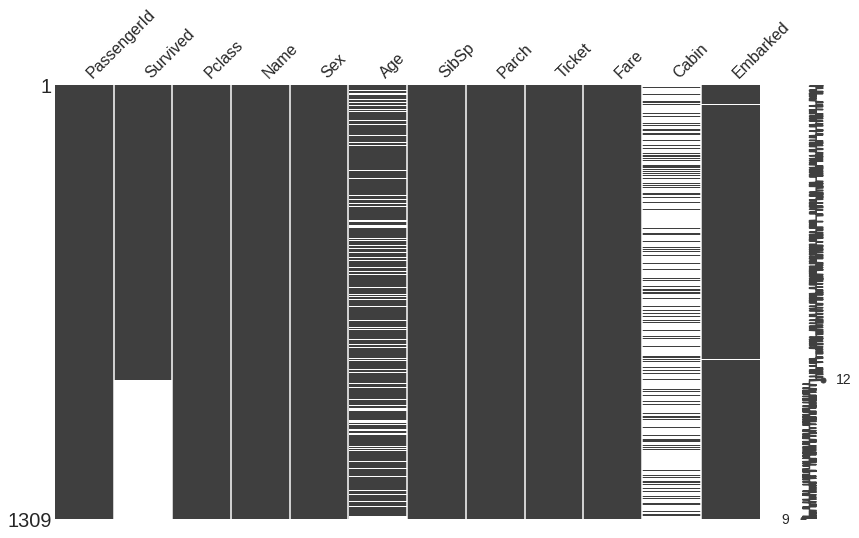

In [20]:
missingno.matrix(data, figsize = (14,8))

`.isnull().sum()` 비어 있는 값들의 개수를 컬럼별로 확인해보기


In [21]:
data.isnull().sum() #비어 있는 값들을 체크해 본다.

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

.isnull().any() 하나라도 결손값이 있는 지 모든 컬럼을 확인하기


In [22]:
data.isnull().any()

PassengerId    False
Survived        True
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked        True
dtype: bool

## 3. 속성의 의미 확인

[캐글 타이타닉 컬럼 설명 링크](https://www.kaggle.com/c/titanic/data)


          Variable          정의                Key

          Survival          생존 여부            0 = No, 1 = Yes

          Pclass            선실 등급            1 = 1st, 2 = 2nd, 3 = 3rd

          Sex               성별    

          Age               나이  

          Sibsp             형재 자매의 수 + 배우자 수

          Parch             부모 수 + 자식 수

          Ticket            표 번호    

          Fare              요금

          Cabin             선실 번호   

          Embarked          승선한 항구         C = Cherbourg, Q = Queenstown, S = Southampton


### 데이터의 분류 
* 데이터의 속성에 따라
    1. 양적
        - 연속형: 키, 몸무게, ...
        - 이산형: 불량품 수, 성공 횟수, ...
    1. 질적(범주형): 성공 유무, 생존여부, ...
* 측정 수준에 따라
    1. 비율척도: 키, 몸무게, 길이 넓이
    1. 등간척도: 연령대, 등간격 소득 수준
    1. 순서척도: 등수, 평점
    1. 명목척도: 성별, 지역, 상품종류

### 타이타닉 데이터 속성 분류
* 질적 데이터 속성: Sex, Embark, Name, Ticket
* 순서척도 속성(정렬이 가능하다): PClass, Carbin
* 연속형 속성: Age, SipSp, Parch, Fare
    * 연속형 속성은 등간척도 속성으로 변환 시킬 수도 있다.



## 4. 속성들의 상관관계 살펴보기

* 상관관계 행렬을 이용하여 변수들간의 상관 계수를 살펴볼 수 있다. 속성들 간의 관계를 분석하는데 힌트를 얻을 수 있고, 전체 데이터를 요약하는데에도 사용된다.

참고: https://seaborn.pydata.org/examples/many_pairwise_correlations.html


### 상관관계 행렬 그리기

* [히트맵](https://seaborn.pydata.org/generated/seaborn.heatmap.html) 

* [판다스 코릴레이션 매트릭스](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)  

* [씨본 콜릴레이션 히트맵](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

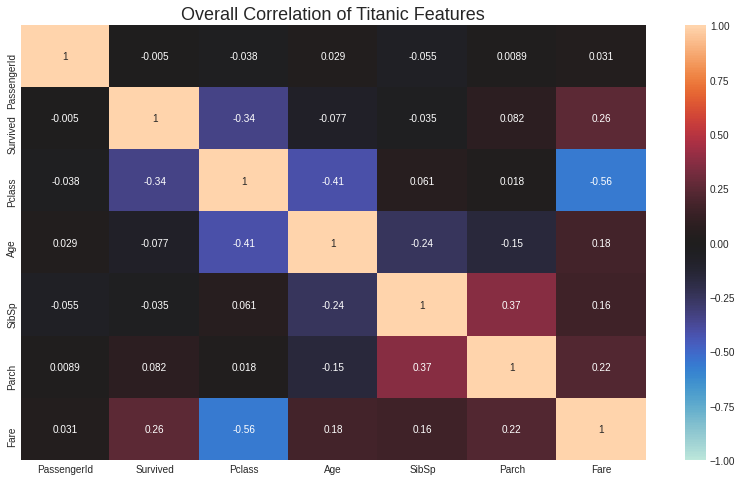

In [23]:
corr = data.corr()
plt.figure(figsize=(14, 8))
plt.title('Overall Correlation of Titanic Features', fontsize=18)
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, center=0) 
plt.show()

## 5. 종속변수 분석

Survived - Key: (0 - Not Survived, 1- Survived)

Survived는 숫자로 주어지지만, 범주형 속성이다. 

범주형인경우 countplot를 그려보면 데이터의 분포를 쉽게 눈으로 확인 할 수 있다.




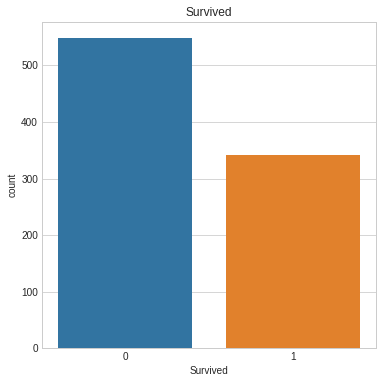

In [24]:
f,ax=plt.subplots(figsize=(6, 6))
ax.set_title('Survived')
sns.countplot('Survived',data=train, ax=ax)
plt.show()

## 6. 독립변수 분석


### data 복사

* 데이터가 안전하게 유지될 수 있도록 복사하여 temp를 만다.
* temp에 새로운 속성을 추가 할 수 있다.


In [25]:
temp = data.copy()

### "Pclass" 분석

* Pclass는 값이 숫자이나 순서(서열)가 있는 값이다.
* Key:1 = 1st, 2= 2nd, 3 = 3rd
* Pclass의 값에 따라 생존이 어떻게 달라졌는지 살펴본다.

참고: [groupby() 사용법](https://jjangjjong.tistory.com/7)

`groupby()` 를 이용하여 Pclass 별로 생존/사망한 사람 수를 구하기

In [26]:
train.groupby(['Pclass','Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

`groupby()` 를 이용하여 Pclass 별로 생존 비율 구하기

In [27]:
train.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

`pd.crosstab()` 을 이용하여 빈도표 만들기

참고: [pandas crosstab](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html)

In [28]:
pd.crosstab(train.Pclass, train.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


아래 함수를 이용하여 "Pclass"의 생존률 그래프와 생존자/사망자 수를 그리기


In [29]:
def plot_pct_counts(col, target, data):
    f,ax=plt.subplots(1,2,figsize=(12,5))
    data.groupby([col])[target].mean().plot(kind='bar', ax=ax[0])
    ax[0].set_title(f"{target} percent by {col}")
    sns.countplot(col, hue=target, data=data, ax=ax[1])
    ax[1].set_title(f"{target} counts by {col}")
    ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
    plt.show()
    

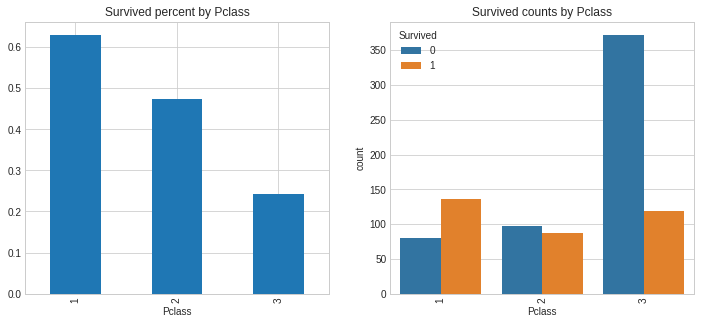

In [30]:
plot_pct_counts("Pclass", "Survived", train)

### "Sex" 분석

생존률 그래프와 생존자/사망자 수를 그리기

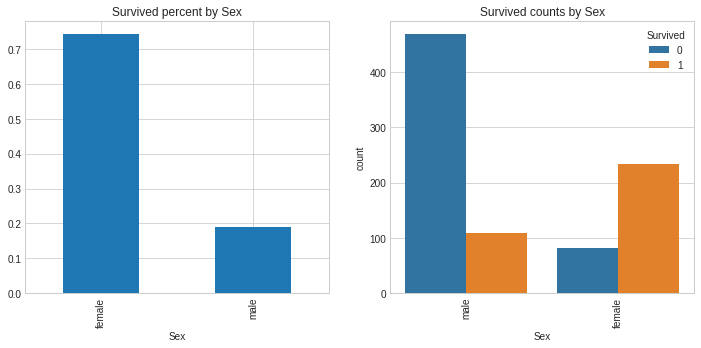

In [31]:
plot_pct_counts("Sex", "Survived", train)

빈도수 데이블 그리기

In [32]:
pd.crosstab([train.Sex, train.Survived],train.Pclass,margins=True).style.background_gradient(cmap='summer_r')

### "Name" 분석
* 이름 분석은 굉장히 많은 경우의 수가 있을 수 있다.
* 아마도 겹치는 이름이 거의 없을 것으로 예상 할 수 있다.
* 이름에서 의미를 가지는 부분 예) Miss, Mr 등을 따로 처리 해줄 필요가 있다.
    * Mr. Miss. 등과 같이 `.`으로 끝나는 단어는 의미가 있을 것으로 추정 할 수 있다.
    * 정규식을 이용하여 `.`으로 끝나는 단어를 분리해 낼 수 있다.

    * 분리한 부분을 ['Initial']이란 새로운 속성으로 저장한다.

    * Mr. Miss. Mrs. 등과 같이 `.`으로 끝나는 단어를 분리하는 정규식은 `([A-Za-z]+).` 이다.

참고: [정규식](https://wikidocs.net/4308)

In [33]:
data.Name.value_counts()

Connolly, Miss. Kate               2
Kelly, Mr. James                   2
Khalil, Mr. Betros                 1
Mineff, Mr. Ivan                   1
Olsvigen, Mr. Thor Anderson        1
                                  ..
Allen, Miss. Elisabeth Walton      1
Rouse, Mr. Richard Henry           1
Sage, Mr. Frederick                1
Elias, Mr. Dibo                    1
Johnson, Mr. William Cahoone Jr    1
Name: Name, Length: 1307, dtype: int64

temp 데이터프레임에 승객의 이름에서 호칭(Mr, Miss, Dr 등)을 추출하여 "Initial" 속성으로 추가한다.

"Initial"의 빈도수를 살펴본다.

In [34]:
temp = data.copy()
temp['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')
temp['Initial'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Mlle          2
Ms            2
Major         2
Capt          1
Countess      1
Dona          1
Sir           1
Don           1
Lady          1
Jonkheer      1
Mme           1
Name: Initial, dtype: int64

In [35]:
pd.crosstab(temp.Initial, temp.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0
male,1,4,0,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1


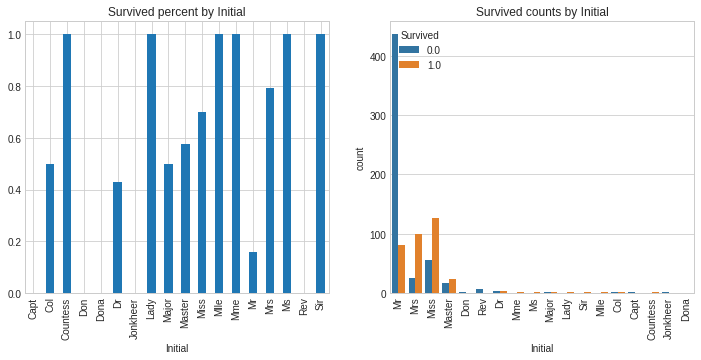

In [36]:
plot_pct_counts("Initial", "Survived", temp)

이니셜을 정리하여 단순화 시킨다.


In [37]:
initial_dict={
    "Capt":"Other",
    "Dr":"Other",
    "Rev":"Other",
    "Col":"Other",
    "Major":"Other",
    "Ms":"Miss",
    "Don":"Mr",
    "Jonkheer":"Mr",
    "Dona":"Mrs",
    "Mlle":"Nobles",
    "Countess":"Nobles",
    "Sir":"Nobles",
    "Mme":"Nobles",
    "Lady":"Nobles"
}

temp["Initial"].replace(initial_dict.keys(),initial_dict.values(),inplace=True)
pd.crosstab(temp.Initial,temp.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Master,Miss,Mr,Mrs,Nobles,Other
Sex,,,,,,
female,0,262,0,198,5,1
male,61,0,759,0,1,22


"Name"에서 lastname을 추출하여 "LastName" 속성을 만든다.

In [38]:
temp['LastName'] = data.Name.str.extract('^([A-Za-z]+)')

In [39]:
pd.crosstab(temp.LastName, temp.Survived).T.style.background_gradient(cmap='summer_r')

"LastName"을 전부 숫자로 바꾼다.

In [40]:
temp['NumName'] = temp['LastName'].factorize()[0]

In [41]:
pd.crosstab(temp.NumName, temp.Survived).T.style.background_gradient(cmap='summer_r')

### "Age" 분석

* Age 는 결측치가 가장 많은 속성이기 때문에, 결측치를 잘 채워넣는 것이 분석의 핵심이다.

`describe()` "Age"의 기본 통계값을 살펴본다.

In [42]:
data['Age'].describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

"Age"에 대해서 swarmplot 을 그려본다.

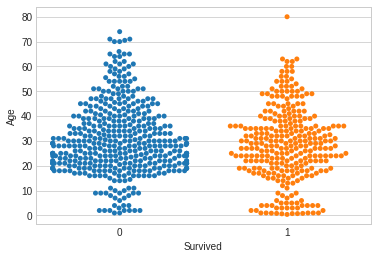

In [43]:
sns.swarmplot(x=train['Survived'], y=train['Age'])
plt.xlabel("Survived")
plt.ylabel("Age")
plt.show()

"Age"에 대해서 violinplot 을 그려본다.

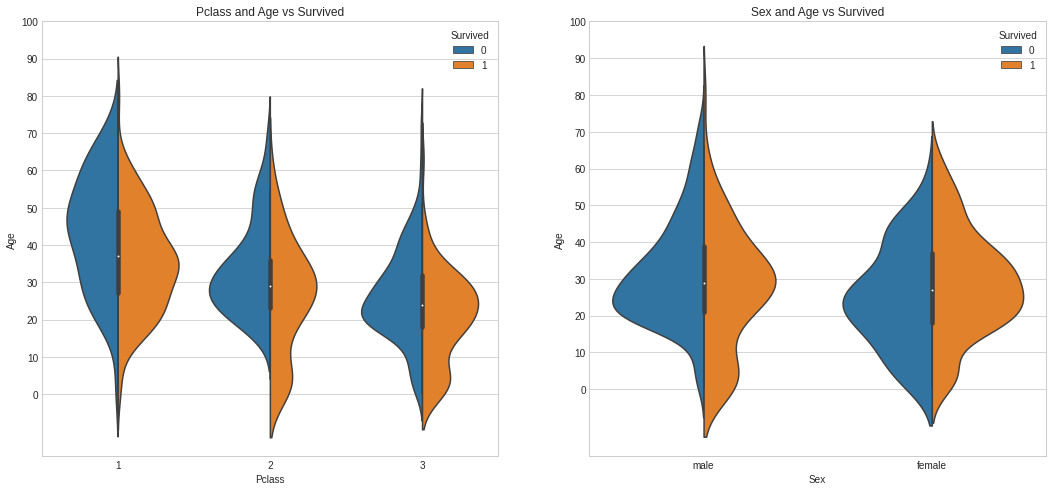

In [44]:
f, ax = plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass", "Age", hue="Survived", data=train, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot("Sex","Age", hue="Survived", data=train, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

#### "Age"의 결측치 채우기

* 이니셜의 평균 연령으로 결측치를 채운다.



In [45]:
temp.groupby('Initial').agg({'Age': ['mean', 'count']}) #이니셜 별 평균 연령 체크

Age      
              mean count
Initial                 
Master    5.482642    53
Miss     21.803744   211
Mr       32.275300   583
Mrs      37.005848   171
Nobles   33.666667     6
Other    46.272727    22

In [46]:
# 비어 있는 "Age" 값을 이니셜의 평균으로 채운다.
print(temp)
temp.reset_index(inplace=True)
temp['Age'] = temp.groupby("Initial")["Age"].apply(lambda x:x.fillna(x.mean()))
temp

     PassengerId  Survived  Pclass  ... Initial   LastName  NumName
0              1       0.0       3  ...      Mr     Braund        0
1              2       1.0       1  ...     Mrs    Cumings        1
2              3       1.0       3  ...    Miss  Heikkinen        2
3              4       1.0       1  ...     Mrs   Futrelle        3
4              5       0.0       3  ...      Mr      Allen        4
..           ...       ...     ...  ...     ...        ...      ...
413         1305       NaN       3  ...      Mr    Spector      850
414         1306       NaN       1  ...     Mrs      Oliva      851
415         1307       NaN       3  ...      Mr    Saether      852
416         1308       NaN       3  ...      Mr       Ware      799
417         1309       NaN       3  ...  Master      Peter      116

[1309 rows x 15 columns]


,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName,NumName
0,0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,Mr,Braund,0
1,1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Mrs,Cumings,1
2,2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Heikkinen,2
3,3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Mrs,Futrelle,3
4,4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,Mr,Allen,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,413,1305,NaN,3,"Spector, Mr. Woolf",male,32.275300,0,0,A.5. 3236,8.0500,NaN,S,Mr,Spector,850
1305,414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C,Mrs,Oliva,851
1306,415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr,Saether,852
1307,416,1308,NaN,3,"Ware, Mr. Frederick",male,32.275300,0,0,359309,8.0500,NaN,S,Mr,Ware,799


### "SibSp" (형제/배우자), "Parch"(부모/자식) 분석

* SibSp - 이 항목은 탑승자가 혼자인지 또는 가족과 함께 있는지를 나타낸다.
    * Sibling = 형제, 자매, 의붓 형제, 이복 누이
    * Spouse = 남편, 아내
* Parch는 부모와 함께 탔는지를 봅니다.
* 새로은 속성 추가
    * "Alone" 혼자서 배를 탑승했는지 여부 0- 혼자 탑승, 1-가족과 같승
    * "FamilySize" 가족의 명수

In [47]:
# 혼자 탔다면 "Alone" 값을 1로 수정한다.
temp['Alone'] = 0
temp.loc[(temp['SibSp'] == 0) & (temp['Parch'] == 0), 'Alone'] = 1

In [48]:
# 가족수를 구하여 "FamilySize" 속성 값으로 한다.
temp['FamilySize'] = temp['Parch'] + temp['SibSp'] + 1

In [49]:
temp.head(n=10)

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName,NumName,Alone,FamilySize
0,0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0000,1,0,A/5 21171,7.2500,NaN,S,Mr,Braund,0,0,2
1,1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0000,1,0,PC 17599,71.2833,C85,C,Mrs,Cumings,1,0,2
2,2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0000,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Heikkinen,2,1,1
3,3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0000,1,0,113803,53.1000,C123,S,Mrs,Futrelle,3,0,2
4,4,5,0.0,3,"Allen, Mr. William Henry",male,35.0000,0,0,373450,8.0500,NaN,S,Mr,Allen,4,1,1
5,5,6,0.0,3,"Moran, Mr. James",male,32.2753,0,0,330877,8.4583,NaN,Q,Mr,Moran,5,1,1
6,6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0000,0,0,17463,51.8625,E46,S,Mr,McCarthy,6,1,1
7,7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0000,3,1,349909,21.0750,NaN,S,Master,Palsson,7,0,5
8,8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0000,0,2,347742,11.1333,NaN,S,Mrs,Johnson,8,0,3
9,9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0000,1,0,237736,30.0708,NaN,C,Mrs,Nasser,9,0,2


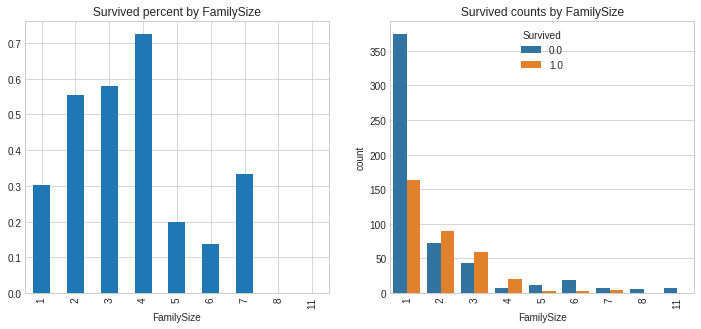

In [50]:
# 가족수와 생존률 관계 살펴보기
plot_pct_counts("FamilySize", "Survived", temp)

In [51]:
# 가족수와 생존/사망이 "Pclass"에 따른 빈도표 생성
pd.crosstab([temp.FamilySize, temp.Survived], temp.Pclass, margins=True).style.background_gradient(cmap='summer_r')

### "Ticket" 분석

In [52]:
temp["Ticket"].head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

"Ticket"의 첫 부분 추출

In [53]:
temp.Ticket.str.split(" ").str[0]

0              A/5
1               PC
2         STON/O2.
3           113803
4           373450
           ...    
1304          A.5.
1305            PC
1306    SOTON/O.Q.
1307        359309
1308          2668
Name: Ticket, Length: 1309, dtype: object

In [54]:
temp['Initick'] = temp["Ticket"].str.split(" ").str[0]
temp['NumTicket'] = temp['Initick'].factorize()[0]
temp

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName,NumName,Alone,FamilySize,Initick,NumTicket
0,0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,Mr,Braund,0,0,2,A/5,0
1,1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Mrs,Cumings,1,0,2,PC,1
2,2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Heikkinen,2,1,1,STON/O2.,2
3,3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Mrs,Futrelle,3,0,2,113803,3
4,4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,Mr,Allen,4,1,1,373450,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,413,1305,NaN,3,"Spector, Mr. Woolf",male,32.275300,0,0,A.5. 3236,8.0500,NaN,S,Mr,Spector,850,1,1,A.5.,123
1305,414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C,Mrs,Oliva,851,1,1,PC,1
1306,415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr,Saether,852,1,1,SOTON/O.Q.,109
1307,416,1308,NaN,3,"Ware, Mr. Frederick",male,32.275300,0,0,359309,8.0500,NaN,S,Mr,Ware,799,1,1,359309,754


### "Fare" 분석

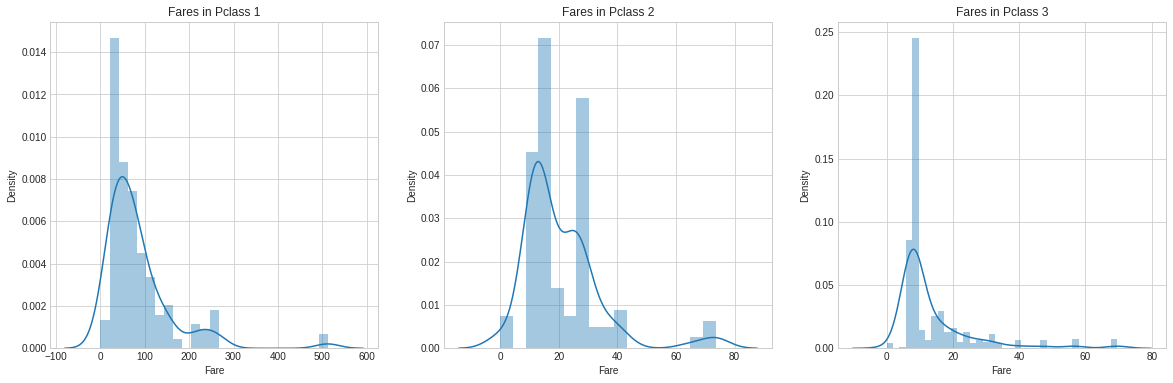

In [55]:
# 
f,ax=plt.subplots(1, 3, figsize=(20, 6))
sns.distplot(train[train['Pclass'] == 1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(train[train['Pclass'] == 2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(train[train['Pclass'] == 3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

### "Cabin" 분석
* cabin 의 위치에 따라 달라지는 것이 있는 지 살펴본다.

In [56]:
temp.Cabin.value_counts()

C23 C25 C27        6
B57 B59 B63 B66    5
G6                 5
F4                 4
F2                 4
                  ..
A24                1
B94                1
A18                1
C148               1
C49                1
Name: Cabin, Length: 186, dtype: int64

In [57]:
temp['Inicab'] = temp['Cabin'].str.extract('^([A-Za-z]+)')
temp['Inicab'].value_counts()

C    94
B    65
D    46
E    41
A    22
F    21
G     5
T     1
Name: Inicab, dtype: int64

In [58]:
temp.Cabin.isnull().sum()

1014

In [59]:
temp.loc[temp['Cabin'].isnull(), "Inicab"] = "X"

In [60]:
temp['Inicab'].value_counts()

X    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Inicab, dtype: int64

### "Embarked" 분석

In [61]:
pd.crosstab([temp.Embarked, temp.Pclass], [temp.Sex, temp.Survived], margins=True).style.background_gradient(cmap='summer_r')

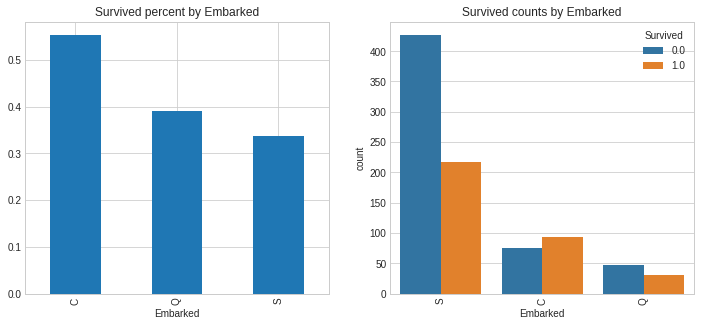

In [62]:
plot_pct_counts("Embarked", "Survived", temp)